# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

# Specify the path to the folder you want to delete
dest = '/content/data'

if os.path.exists(dest) and os.path.isdir(dest):
    shutil.rmtree(dest)

src = '/content/drive/MyDrive/EEGBrainInvadersData'
destination = shutil.copytree(src, dest)

# Data Exploration

In [ ]:
# Print list of files in data folder

import os

files = os.listdir('/content/data')

for file in files:
    print(file)

subject_01.csv
csv
bi2014a_report_publication.pdf


In [ ]:
# build dataframe from subject_01.csv

import pandas as pd

file_path = '/content/data/subject_01.csv'
subject_1 = pd.read_csv(file_path)


header_df = pd.read_csv('/content/data/csv/Header.csv')
labels = header_df.columns.tolist()
print("Labels:", labels)
subject_1.columns = labels

subject_1.describe()

Labels: ['Time', ' Fp1', 'Fp2', 'F5', 'AFZ', 'F6', 'T7', 'Cz', 'T8', 'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'Oz', 'O2', 'Event', 'Target']


,Time,Fp1,Fp2,F5,AFZ,F6,T7,Cz,T8,P7,P3,PZ,P4,P8,O1,Oz,O2,Event,Target
count,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000
mean,408.129918,76.423261,21.310237,-104.305588,-108.902871,-98.538516,-9.568615,-193.610905,-84.776468,-56.622100,-41.790686,-102.276581,-66.569333,-150.322722,-73.433531,-198.879842,-73.298453,0.168478,0.003316
std,235.633622,159.335918,137.114631,756.541038,1814.894916,474.709326,457.590921,4785.644989,491.751204,251.927251,1133.640209,2765.253846,2091.438415,797.574849,1163.283001,1459.966576,931.642374,3.347847,0.065215
min,0.001953,-1867.900000,-676.470000,-2520.700000,-5468.500000,-1936.900000,-1623.200000,-19123.000000,-1660.000000,-619.410000,-3378.500000,-8694.600000,-6114.700000,-2100.400000,-3795.000000,-6347.600000,-2521.900000,0.000000,0.000000
25%,204.067500,-31.165250,-76.569250,-772.410000,-1716.300000,-473.280000,-446.280000,-4598.500000,-494.212500,-307.822500,-1084.500000,-2461.400000,-1834.325000,-883.310000,-1144.600000,-1274.700000,-912.960000,0.000000,0.000000
50%,408.130000,79.982000,21.090500,-90.261500,-91.735500,-82.289000,-6.283300,-189.900000,-112.035000,-56.892500,-40.304000,-94.678000,-46.071000,-138.795000,-64.902000,-163.680000,-66.959000,0.000000,0.000000
75%,612.192500,194.120000,130.970000,613.010000,1559.700000,333.292500,425.310000,4257.200000,318.760000,196.420000,998.730000,2288.600000,1765.700000,613.112500,1025.900000,1005.600000,786.822500,0.000000,0.000000
max,816.260000,553.220000,957.380000,1750.700000,4633.400000,1789.600000,1531.100000,18407.000000,4359.000000,486.900000,3135.400000,7780.600000,5521.600000,1318.800000,2857.800000,4702.900000,2115.400000,106.000000,2.000000


In [ ]:
df.tail()

,Time,Fp1,Fp2,F5,AFZ,F6,T7,Cz,T8,P7,P3,PZ,P4,P8,O1,Oz,O2,Event,Target
417919,816.25,-158.64,-402.52,1255.30,1786.20,873.760,345.68,4176.6,877.11,215.320,1061.400,2537.20,1732.40,858.740,1256.50,1033.90,1018.30,0,0
417920,816.25,-233.78,-463.72,1085.60,1405.30,738.400,113.96,3984.6,636.31,59.022,710.460,2032.40,1244.10,605.190,1037.30,800.77,806.26,0,0
417921,816.25,-331.11,-547.47,680.73,459.98,476.650,-237.28,2041.2,247.48,-159.190,32.431,753.54,187.75,99.366,421.45,216.38,297.59,0,0
417922,816.26,-410.00,-622.73,182.15,-711.75,194.210,-565.18,-1063.3,-133.93,-332.540,-695.840,-846.64,-1047.00,-463.540,-377.53,-504.46,-326.86,0,0
417923,816.26,-441.79,-634.93,-172.03,-1537.80,33.115,-717.00,-3775.6,-341.68,-392.740,-1144.400,-1979.50,-1860.10,-822.830,-969.59,-1010.80,-760.45,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417924 entries, 0 to 417923
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    417924 non-null  float64
 1    Fp1    417924 non-null  float64
 2   Fp2     417924 non-null  float64
 3   F5      417924 non-null  float64
 4   AFZ     417924 non-null  float64
 5   F6      417924 non-null  float64
 6   T7      417924 non-null  float64
 7   Cz      417924 non-null  float64
 8   T8      417924 non-null  float64
 9   P7      417924 non-null  float64
 10  P3      417924 non-null  float64
 11  PZ      417924 non-null  float64
 12  P4      417924 non-null  float64
 13  P8      417924 non-null  float64
 14  O1      417924 non-null  float64
 15  Oz      417924 non-null  float64
 16  O2      417924 non-null  float64
 17  Event   417924 non-null  int64  
 18  Target  417924 non-null  int64  
dtypes: float64(17), int64(2)
memory usage: 60.6 MB


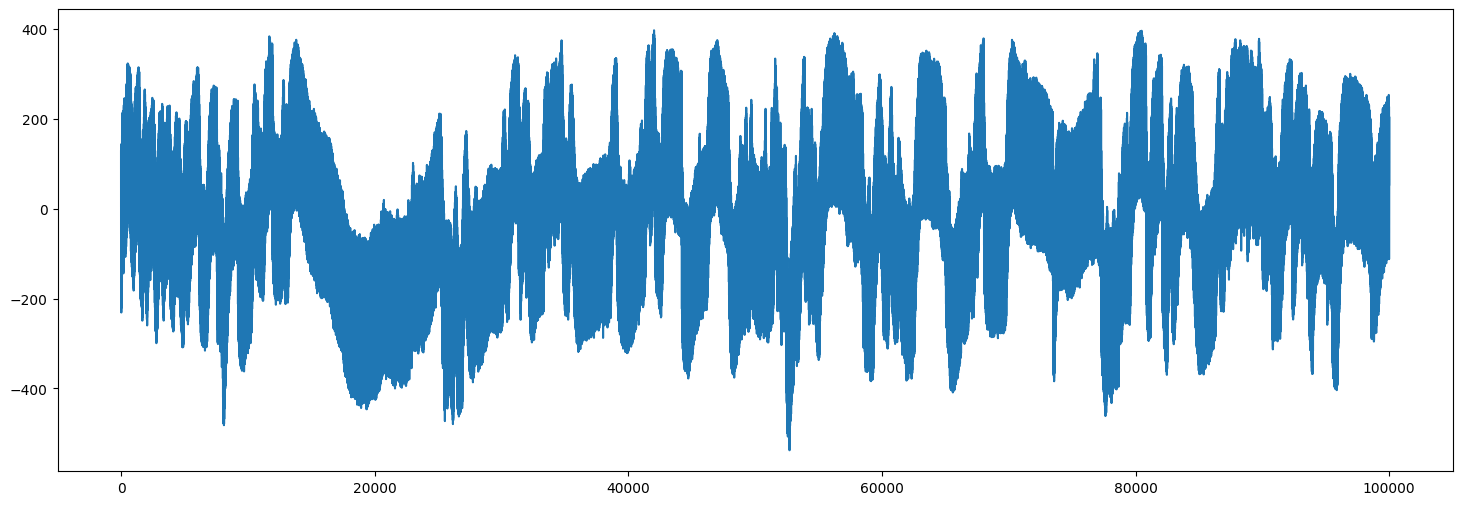

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
subject_1['Fp2'].iloc[0:100001].plot()
plt.show()

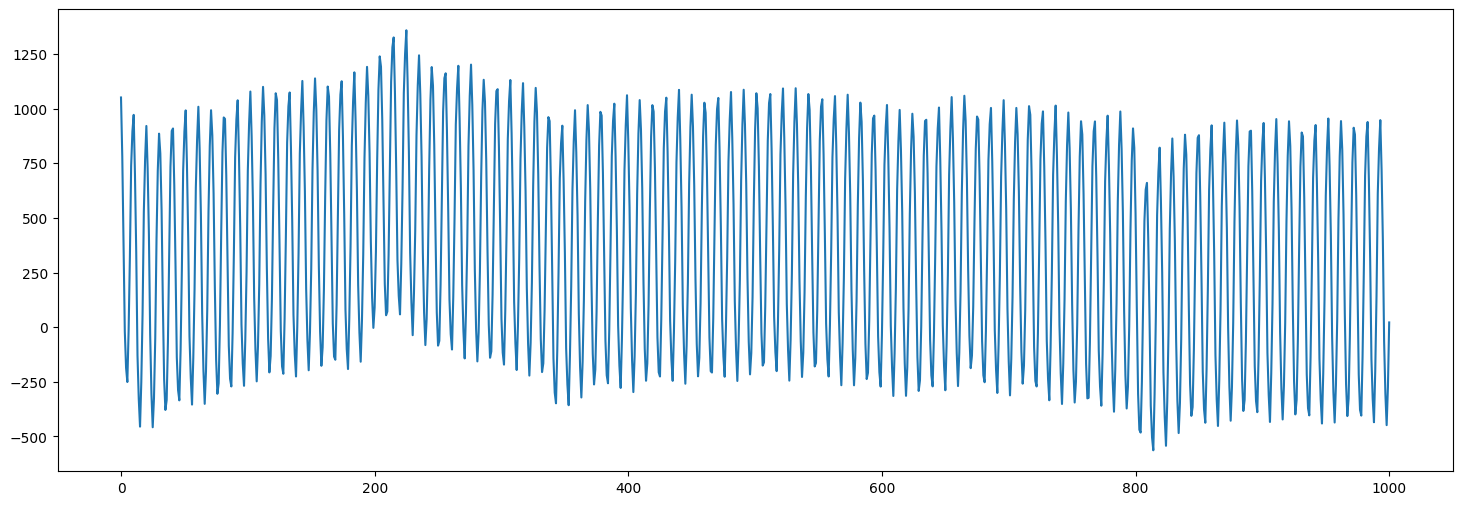

In [ ]:
plt.figure(figsize=(18, 6))
subject_1['T7'].iloc[0:1001].plot()
plt.show()

Hypothesis: Subject's brain activity slowly decreases with novelty of the game.

In [ ]:
subject_1_averages = subject_1.copy()

In [ ]:
for j in range(1,len(labels)-2):
  entries = subject_1.iloc[j]
  for i in range(len(subject_1_averages.iloc[j])-1):
    avg = sum(entries[i:i+2]) / 2

    s1al = subject_1_averages.iloc[j]
    s1al.iloc[i] = avg
    s1al.iloc[i+1] = avg
    subject_1_averages.iloc[j] = s1al

<ipython-input-36-66a6bdf31f2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1al.iloc[i] = avg
<ipython-input-36-66a6bdf31f2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1al.iloc[i+1] = avg


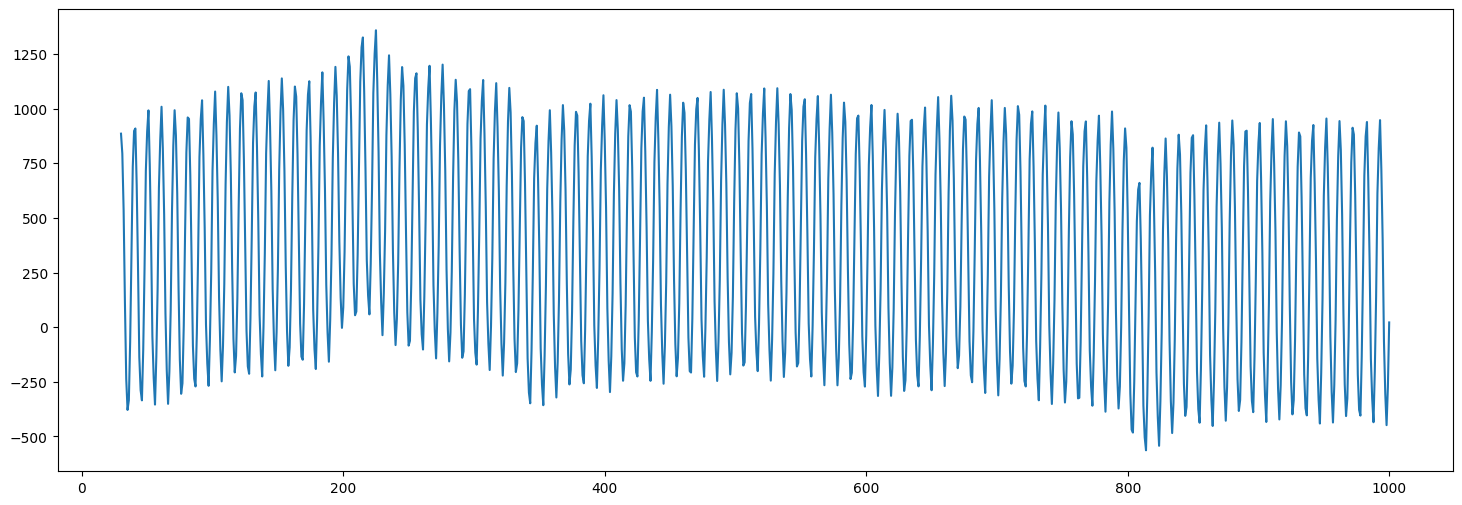

In [ ]:
plt.figure(figsize=(18, 6))
subject_1_averages['T7'].iloc[30:1001].plot()
plt.show()